In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


a. Loading and preprocessing the image data

In [2]:
cifar_train=pd.read_csv('./train_data.csv')
x_train=cifar_train.drop('label',axis=1).values
y_train=cifar_train['label'].values

print(x_train.shape)
print(y_train.shape)

(50000, 3072)
(50000,)


In [3]:
cifar_test=pd.read_csv('./test_data.csv')
x_test=cifar_test.drop('label',axis=1).values
y_test=cifar_test['label'].values

print(x_test.shape)
print(y_test.shape)

(10000, 3072)
(10000,)


In [4]:
x_train=x_train/255.0
x_test=x_test/255.0

x_train=x_train.reshape((-1,32,32,3))
x_test=x_test.reshape((-1,32,32,3))

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


b. Defining the model's architecture

In [5]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c. Training the model

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [7]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.3679 - loss: 1.7172 - val_accuracy: 0.5464 - val_loss: 1.2745
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.5897 - loss: 1.1526 - val_accuracy: 0.6291 - val_loss: 1.0543
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6602 - loss: 0.9732 - val_accuracy: 0.6654 - val_loss: 0.9626
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7017 - loss: 0.8526 - val_accuracy: 0.6887 - val_loss: 0.8972
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.7332 - loss: 0.7566 - val_accuracy: 0.6910 - val_loss: 0.9095
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7566 - loss: 0.6942 - val_accuracy: 0.6967 - val_loss: 0.8786
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7820 - loss: 0.6196 - val_accuracy: 0.7137 - val_loss: 0.8434
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8056 -

d. Estimating the model's performance

In [8]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test accuracy:{test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7211 - loss: 0.8552
Test accuracy:0.722100019454956


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Actual Label:  airplane
Predicted Label:  ship


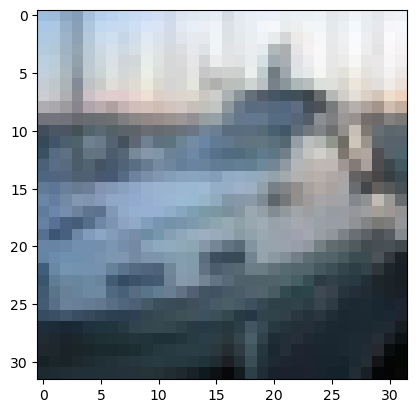

In [9]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

n=2
plt.imshow(x_test[n].reshape(32,32,3))

predictions=model.predict(x_test)

print("Actual Label: ",classes[np.argmax(y_test[n])])
print("Predicted Label: ", classes[np.argmax(predictions[n])])